In [1]:
#IMPORT LIBRARIES 
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [3]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [ ]:
#Combining train and test data for exploratory
Finance = pd.concat([Train,Test])

In [4]:
#viewing the dataset
Finance.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1.0
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0.0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1.0
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1.0
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1.0


In [5]:
#Checking the number of rows & columns using shape attribute
Finance.shape

(17908, 21)

In [40]:
#Data information
Finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17908 entries, 0 to 5391
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4        

In [7]:
Finance.pay_schedule.unique()

array(['bi-weekly', 'semi-monthly', 'weekly', 'monthly'], dtype=object)

In [8]:
# Check column names
Finance.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [9]:
# Statistical summary for the dataset
Finance.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,12516.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.540588
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622973,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [10]:
# check missing values in the dataset
Finance.isnull().sum()

Entry_id                   0
age                        0
pay_schedule               0
home_owner                 0
income                     0
months_employed            0
years_employed             0
current_address_year       0
personal_account_m         0
personal_account_y         0
has_debt                   0
amount_requested           0
risk_score                 0
risk_score_2               0
risk_score_3               0
risk_score_4               0
risk_score_5               0
ext_quality_score          0
ext_quality_score_2        0
inquiries_last_month       0
e_signed                5392
dtype: int64

In [12]:
#Generating the names of columns using column attribute
categorical_columns = [col for col in Finance.columns if Finance[col].dtype == "object" ]
categorical_columns

['pay_schedule']

In [13]:
print("Total Number of unique values in the pay_schedule Column : {}". format(len(Finance['pay_schedule'].unique().tolist())))

Total Number of unique values in the pay_schedule Column : 4


In [14]:
#discovering more insight found in the pay_schedule
Finance.pay_schedule.value_counts()

bi-weekly       10716
weekly           3696
semi-monthly     2004
monthly          1492
Name: pay_schedule, dtype: int64

In [15]:
#creating a groupby object with the "pay_schedule Column", and aggregation function of sum and mean, Using the groupby object, display a table that shows the income of each pay_schedule, and determine the pay_schedule with the highest total income, months_employed, e_signed,  etc

# Groupby
Finance.groupby(["pay_schedule"]).mean()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
pay_schedule,,,,,,,,,,,,,,,,,,,,
bi-weekly,5.640872e+06,42.642124,0.422639,3607.140258,1.165360,3.516797,3.568682,3.458473,3.490855,0.805991,927.031448,61066.815976,0.691387,0.878894,0.571502,0.708309,0.622220,0.621343,6.480403,0.533235
monthly,5.449735e+06,48.589142,0.496649,3827.813003,1.024799,3.842493,3.693029,3.247989,3.569035,0.676944,995.880697,62546.983914,0.687199,0.885178,0.514528,0.680057,0.632517,0.634595,6.697051,0.533207
semi-monthly,5.502912e+06,43.899701,0.431138,3935.988523,1.072355,3.673653,3.719561,3.354790,3.520958,0.793413,1080.365269,62220.733533,0.681014,0.883708,0.555013,0.706683,0.619700,0.619400,6.909182,0.574928
weekly,5.580154e+06,41.368236,0.400433,3582.377435,1.372565,3.349026,3.514340,3.448052,3.503517,0.813582,929.550866,59938.054654,0.696234,0.870751,0.659900,0.768772,0.623754,0.620561,6.048160,0.546250


In [16]:
# Groupby
Finance.groupby(["pay_schedule"]).sum()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
pay_schedule,,,,,,,,,,,,,,,,,,,,
bi-weekly,60447584067,456953,4529,38654115,12488,37686,38242,37061,37408,8637,9934069,654392000,7408.900736,9418.230562,6124.220107,7590.238026,6667.709753,6658.309753,69444,3971.0
monthly,8131004733,72495,741,5711097,1529,5733,5510,4846,5325,1010,1485854,93320100,1025.301327,1320.685053,767.676341,1014.644695,943.715713,946.815713,9992,562.0
semi-monthly,11027835325,87975,864,7887721,2149,7362,7454,6723,7056,1590,2165052,124690350,1364.753010,1770.951585,1112.246208,1416.193618,1241.877952,1241.277952,13846,798.0
weekly,20624251025,152897,1480,13240467,5073,12378,12989,12744,12949,3007,3435620,221531050,2573.281312,3218.295161,2438.989240,2841.380116,2305.394084,2293.594084,22354,1435.0


In [17]:
#combining both sum and mean into a single table
payment_schedules = Finance.groupby('pay_schedule')

In [18]:
pd.set_option('display.max_columns',None)
payment_schedules.agg([np.sum, np.mean])

Entry_id                   age            home_owner  \
                      sum          mean     sum       mean        sum   
pay_schedule                                                            
bi-weekly     60447584067  5.640872e+06  456953  42.642124       4529   
monthly        8131004733  5.449735e+06   72495  48.589142        741   
semi-monthly  11027835325  5.502912e+06   87975  43.899701        864   
weekly        20624251025  5.580154e+06  152897  41.368236       1480   

                          income              months_employed            \
                  mean       sum         mean             sum      mean   
pay_schedule                                                              
bi-weekly     0.422639  38654115  3607.140258           12488  1.165360   
monthly       0.496649   5711097  3827.813003            1529  1.024799   
semi-monthly  0.431138   7887721  3935.988523            2149  1.072355   
weekly        0.400433  13240467  3582.377435            5073  1.372565   

             years_employed           current_address_year            \
                        sum      mean                  sum      mean   
pay_schedule                                                           
bi-weekly             37686  3.516797                38242  3.568682   
monthly                5733  3.842493                 5510  3.693029   
semi-monthly           7362  3.673653                 7454  3.719561   
weekly                12378  3.349026                12989  3.514340   

             personal_account_m           personal_account_y            \
                            sum      mean                sum      mean   
pay_schedule                                                             
bi-weekly                 37061  3.458473              37408  3.490855   
monthly                    4846  3.247989               5325  3.569035   
semi-monthly               6723  3.354790               7056  3.520958   
weekly                    12744  3.448052              12949  3.503517   

             has_debt           amount_requested              risk_score  \
                  sum      mean              sum         mean        sum   
pay_schedule                                                               
bi-weekly        8637  0.805991          9934069   927.031448  654392000   
monthly          1010  0.676944          1485854   995.880697   93320100   
semi-monthly     1590  0.793413          2165052  1080.365269  124690350   
weekly           3007  0.813582          3435620   929.550866  221531050   

                           risk_score_2           risk_score_3            \
                      mean          sum      mean          sum      mean   
pay_schedule                                                               
bi-weekly     61066.815976  7408.900736  0.691387  9418.230562  0.878894   
monthly       62546.983914  1025.301327  0.687199  1320.685053  0.885178   
semi-monthly  62220.733533  1364.753010  0.681014  1770.951585  0.883708   
weekly        59938.054654  2573.281312  0.696234  3218.295161  0.870751   

             risk_score_4           risk_score_5           ext_quality_score  \
                      sum      mean          sum      mean               sum   
pay_schedule                                                                   
bi-weekly     6124.220107  0.571502  7590.238026  0.708309       6667.709753   
monthly        767.676341  0.514528  1014.644695  0.680057        943.715713   
semi-monthly  1112.246208  0.555013  1416.193618  0.706683       1241.877952   
weekly        2438.989240  0.659900  2841.380116  0.768772       2305.394084   

                       ext_quality_score_2           inquiries_last_month  \
                  mean                 sum      mean                  sum   
pay_schedule                                                                
bi-weekly     0.622220         6658.309753  0.621343                69444   
monthly       0.6325

In [19]:
payment_schedules.agg({'income':['sum', 'mean']})

income             
                   sum         mean
pay_schedule                       
bi-weekly     38654115  3607.140258
monthly        5711097  3827.813003
semi-monthly   7887721  3935.988523
weekly        13240467  3582.377435

In [22]:
payment_schedules.agg({'e_signed':['sum', 'mean']}) 

e_signed          
                  sum      mean
pay_schedule                   
bi-weekly      3971.0  0.533235
monthly         562.0  0.533207
semi-monthly    798.0  0.574928
weekly         1435.0  0.546250

In [41]:
#In Summary:
#Bi-weekly has the highest total e_signed and income

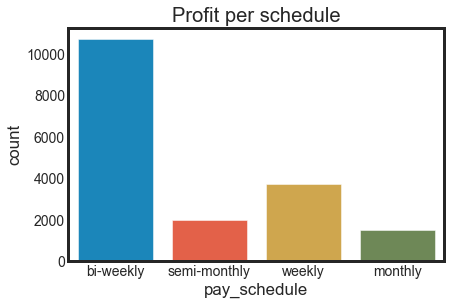

In [45]:
sns.countplot('pay_schedule', data=Finance).set_title('Profit per schedule');

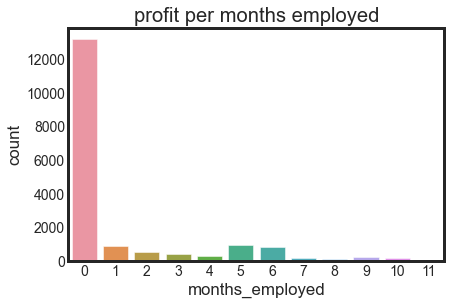

In [44]:
sns.countplot('months_employed', data=Finance).set_title('profit per months employed');

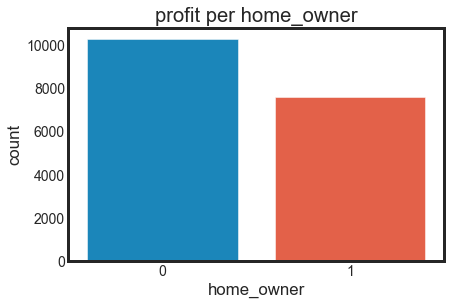

In [46]:
sns.countplot('home_owner', data=Finance).set_title('profit per home_owner');

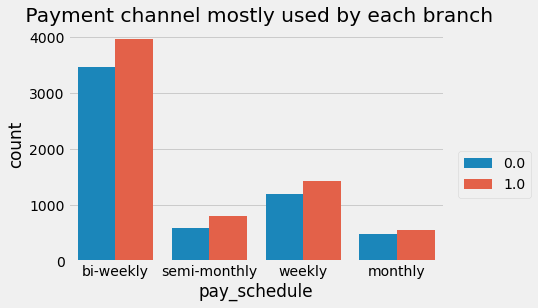

In [29]:
g =sns.countplot(x='pay_schedule',hue='e_signed',data=Finance).set_title(' Payment channel mostly used by each branch')
plt.legend(loc='best', bbox_to_anchor=(1.25, 0.5), ncol=1)

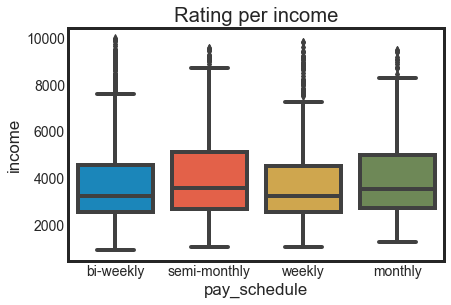

In [47]:
sns.boxplot('pay_schedule', 'income', data=Finance).set_title('Rating per income');

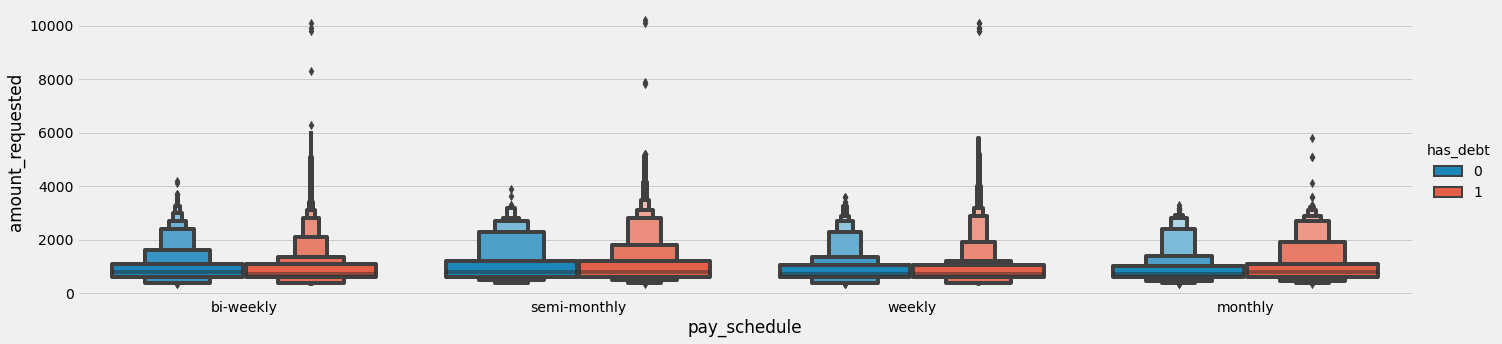

In [31]:
sns.catplot('pay_schedule', 'amount_requested', data=Finance, hue='has_debt', kind='boxen', aspect=4) 
#"point", "bar", "strip", "swarm","box", "violin", or "boxen".

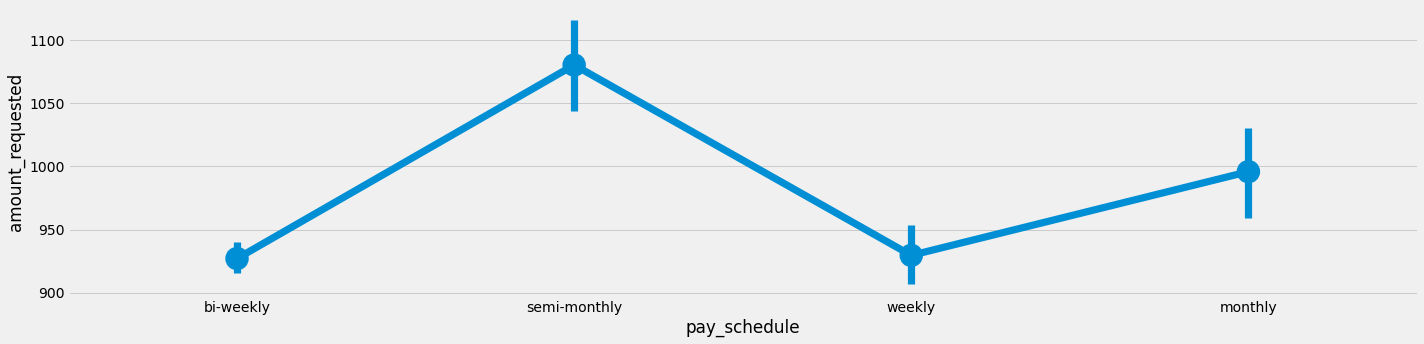

In [32]:
sns.catplot('pay_schedule', 'amount_requested', data=Finance, aspect=4, kind='point')

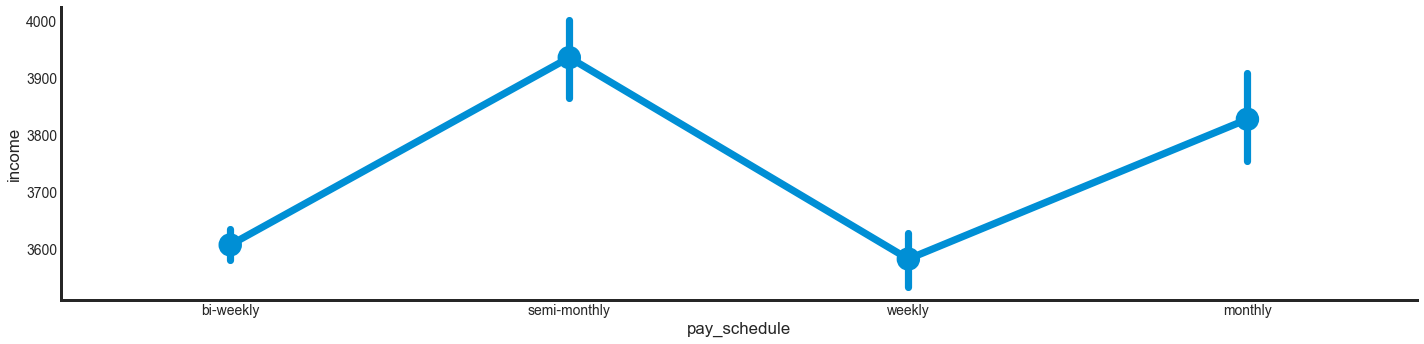

In [36]:
sns.catplot('pay_schedule', 'income', data=Finance, aspect=4, kind='point')

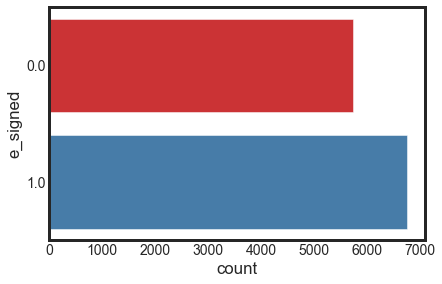

In [34]:
#Target Histogram
sns.set_style("white") 
sns.countplot( y='e_signed', data=Finance, palette="Set1");

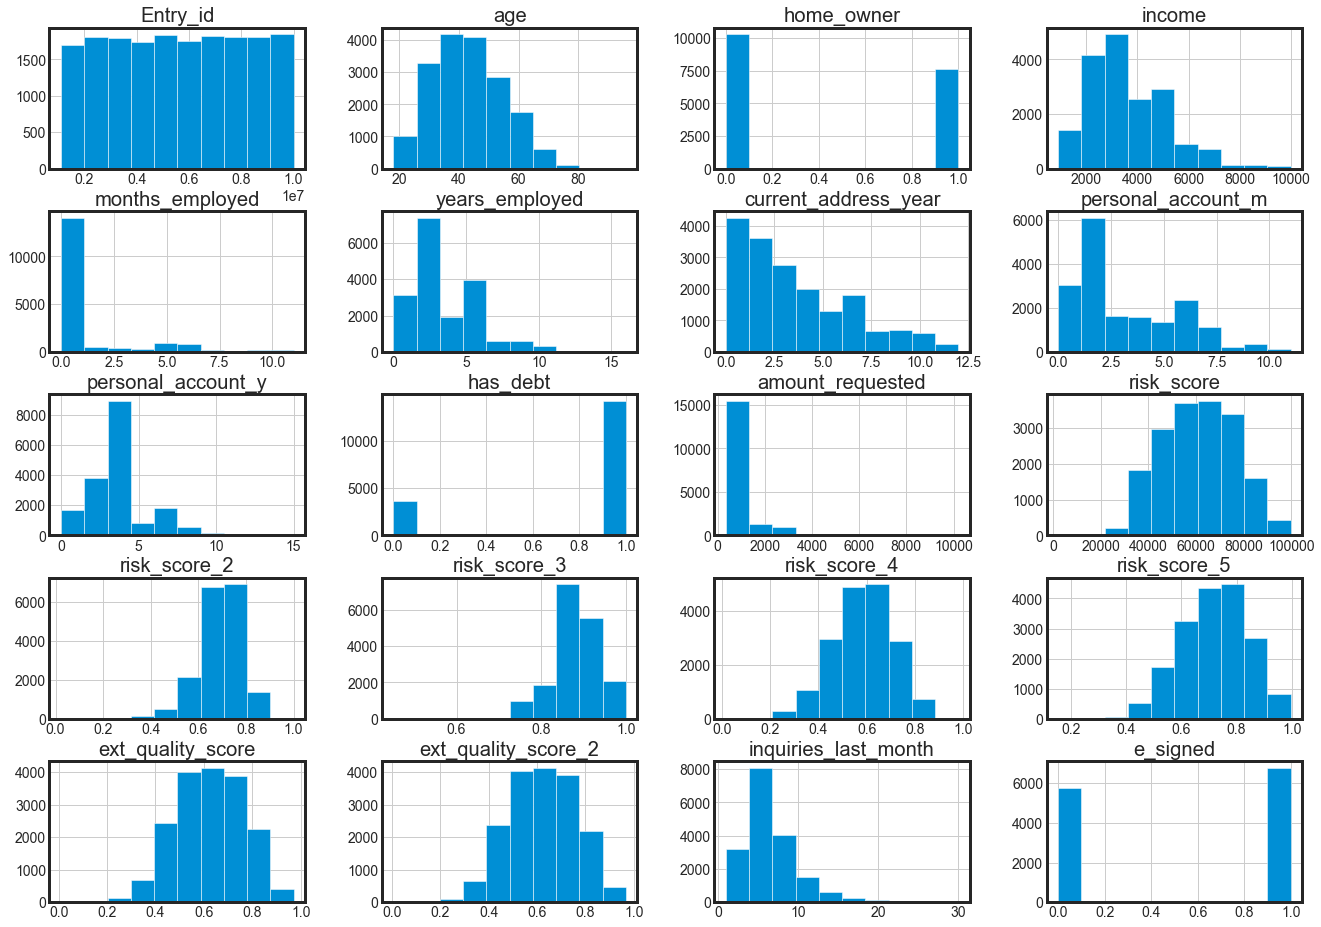

In [37]:
#Numerical Features Histograms (Train)
num_feats = list(Finance.select_dtypes(include=['int64', 'float64', 'int32']).columns)
Finance[num_feats].hist(figsize=(20,15));

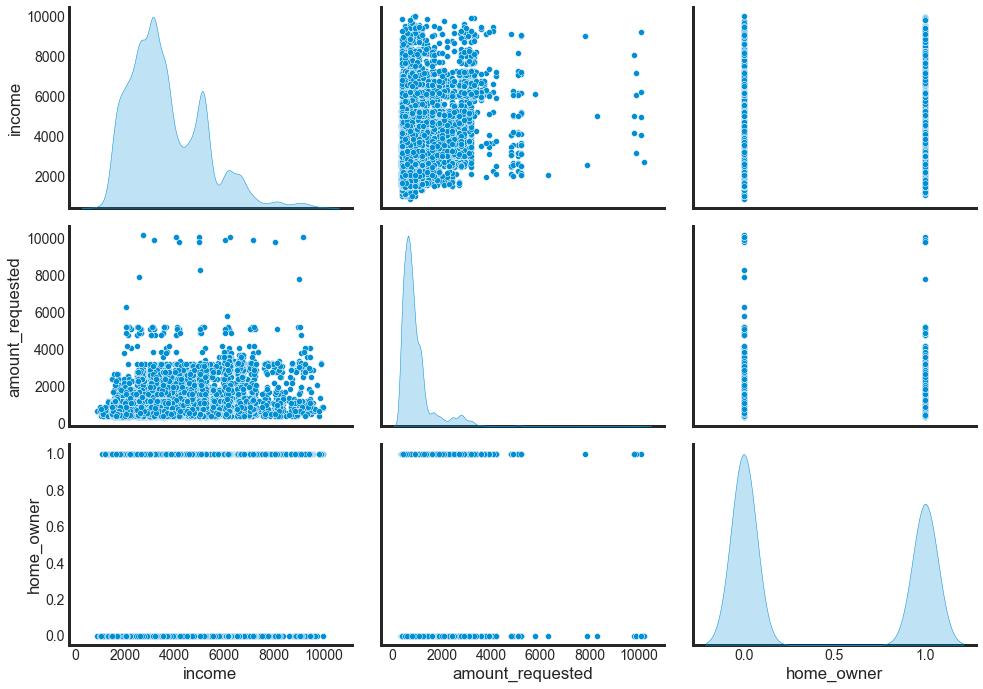

In [38]:
attributes = ["income", "amount_requested","home_owner"]
sns.pairplot(Finance.reset_index(drop=True)[attributes], diag_kind="kde")
plt.gcf().set_size_inches(15, 10)